### Representing Data, Feature Engineering

+ 데이터 표현

    > 어떤 형태의 특성(이산, 범주, 연속)으로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 성능에 주는 영향이 크다.

    > 데이터의 스케일 조정, 단위 맞추기로 생각

+ 특성 공학

    > 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것.

In [1]:
import os, pandas as pd, numpy as np, mglearn, matplotlib.pyplot as plt

#### 범주형

In [2]:
# 범주형 변수 인코딩

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
                   header=None, index_col = False,
                   names =['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
                           'gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

    # 먼저 데이터의 범주, 값의 철자/대소문자 등을 확인한다. > data.xx.value_counts()
print(data.gender.value_counts())

    # get_dummies를 사용해 인코딩
print('\n org ft: \n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('dummies ft: \n', list(data_dummies.columns),'\n')

    # seperate input feature / output  
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

X=features.values
y=data_dummies['income_ >50K'].values
print('\n X.shape: {}, y.shape: {}'.format(X.shape,y.shape))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
print('\n test set score:', logreg.score(X_test,y_test))
logreg.coef_

 Male      21790
 Female    10771
Name: gender, dtype: int64

 org ft: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

dummies ft: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handler

c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.04483179,  0.03171673, -0.33710626,  0.35977816, -0.14735328,
        -0.0613075 , -0.07371013,  0.27621062, -0.40151578, -0.49258832,
        -0.80556961, -0.95626548, -1.02136785, -0.41670802, -1.34198815,
        -1.07030093, -1.23225315, -1.23112963,  0.50497594,  0.48107029,
         1.00790158,  1.96770556, -0.02228115,  1.33865603, -1.73183978,
         1.79841422,  0.24224844, -1.44212223, -0.24103987, -0.39841376,
         0.02225087, -0.64167736,  0.21550292,  0.93678056, -0.7762591 ,
        -0.76133542, -0.12747167, -1.05770751, -1.33437543,  0.60892835,
         0.61593913,  0.3681499 ,  0.64912113, -0.0025947 ]])

In [3]:
# 숫자로 된 범주형 변수
    # 위에서 사용한 get_dummies 함수는 숫자는 모두 연속형으로 판단하여 가변수를 만들지 않는다.
demo_df = pd.DataFrame({'num':[0,1,2,1],'category':['양말','여우','양말','상자']})
pd.get_dummies(demo_df)
    
    # 따라서 숫자도 가변수로 만들고 싶다면 직접 지정해 주어야 한다.
demo_df['num'] = demo_df['num'].astype(str)
pd.get_dummies(demo_df,columns=['num','category'])

,num_0,num_1,num_2,category_상자,category_양말,category_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


#### OneHotEncoder, ColumnTransformer

In [4]:
# 원-핫-인코더
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
    # sparse = True : 희소 행렬 반환  , sparse = False : 넘파이 배열 반환
print(ohe.fit_transform(demo_df))

    # 변환된 특성에 해당하는 원본 범주형 변수 이름
print(ohe.get_feature_names_out())
    # > 모든 변수를 범주형으로 판단함을 알 수 있음. 따라서 ColumnTransformer가 필요

# ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(            # '변환이름', 변환기(), ['적용열']
                        [('scaling',StandardScaler(), ['age','hours-per-week']),
                         ('onehot',OneHotEncoder(sparse=False),['workclass','education','gender','occupation'])])
                                # ct.named_transformers_.onehot > OneHotEncoder 같이 속성 반환 가능
                                # ct.named_transformers_.scaling > StandardScaler

data_features = data.drop('income',axis=1)
X_train,X_test,y_train,y_test = train_test_split(data_features, data.income,random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print('\n test set score: \n', logreg.score(X_test_trans, y_test))


[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]
['num_0' 'num_1' 'num_2' 'category_상자' 'category_양말' 'category_여우']

 test set score: 
 0.808991524382754


#### make_column_transformer로 ColumnTransformer 만들기
클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 편리한 함수

but, 아직 변환된 출력 열에 대응하는 입력열을 찾지 못함. 단지 변환이름을 안써도 된다는것.

In [5]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer( # 변환기(), ['작용열']
                             (StandardScaler(),['age','hours-per-week']),
                             (OneHotEncoder(sparse=False),['workclass','education','gender','occupation']))


#### 구간분할 or 이산화 - 선형모델, 트리모델

+ 일부 특성과 출력이 비선형 관계지만 용량이 크고 고차원 데이터일 경우 선형모델과 구간분할로 모델 성능을 높일 수 있다.

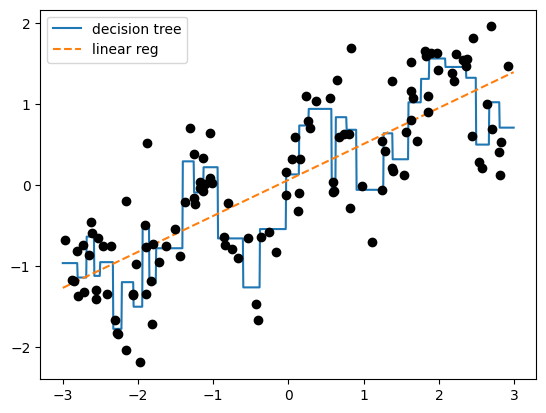

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label='decision tree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line),'--',label='linear reg')

plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')

In [7]:
# 구간분할 - 연속형 데이터에 아주 강력한 선형모델을 만드는 방법.
    # 한 특성을 여러 특성으로 나눈다.
    # 한번에 여러 특성에 적용 가능하며, bin_edge_는 특성별로 경곗값이 저장되어 있다.
    # transform 메서드 사용시 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있다.
    # 구간에 one-hot-encoding을 하여 구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만든다.

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10,strategy='uniform')
    # encode='onehot-dense' 시 밀집 배열이 생성되며 모든 특성을 바로 출력할 수 있다. (to_array없이)
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

X_binned = kb.transform(X)
print('\n', X[:10])
X_binned.toarray()[:10]
# X값이 들어가는 구간에따라 X_binned의 행이 생성됨.
# 

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]

 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

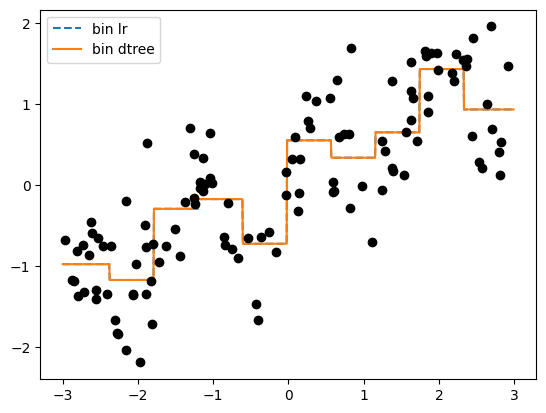

In [8]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line,reg.predict(line_binned),'--',label = 'bin lr')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label = 'bin dtree')

plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')
    # lr과 d tree의 예측이 완전히 동일해짐.
    # 잘 모르겠으면 line, reg.predict(line) 해서 한번 보면 이해됨
    # 각 구간에 대한 상수값을 학습한 결과.

#### Interaction(상호작용) and Polynomial(다항식)

+ 위의 예제에서 기울기를 추가로 학습해본다.

    > 구간으로 분할된 데이터에 원래 특성을 다시 추가한다.

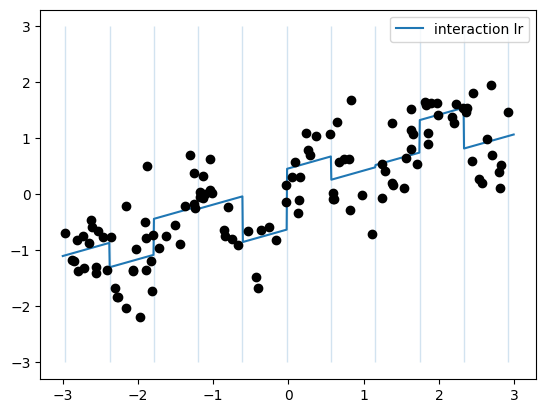

In [9]:
# x축 특성 하나에 대해서 기울기 학습
X_combined = np.hstack([X,X_binned])    # shape = (120,11)

reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line,line_binned])

plt.plot(line,reg.predict(line_combined),label='interaction lr')
plt.legend(loc='best')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.plot(X[:,0],y,'o',c='k')

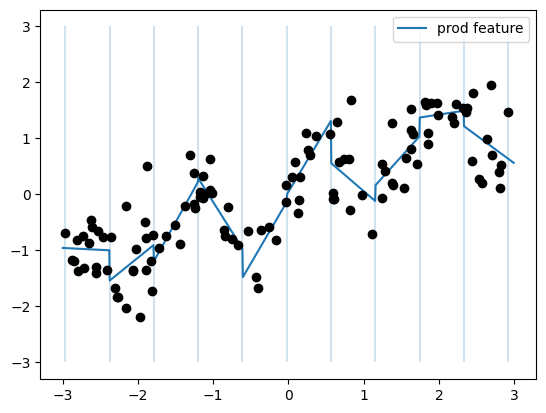

In [68]:
# 각 구간에서 다른 기울기를 갖게 학습
    # 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가. == 구간 특성 * 원본 특성

X_production = np.hstack([X_binned,X*X_binned])
X_production.shape # 곱셈 특성 = 각 구간에 대한 x축 특성의 복사본. 짧은 구간에서는 원본 특성, 다른 곳에서는 0

reg = LinearRegression().fit(X_production,y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line,reg.predict(line_product),label='prod feature')
plt.legend(loc='best')
plt.vlines(kb.bin_edges_[0],-3,3,alpha=.2)
plt.plot(X[:,0],y,'o',c='k')


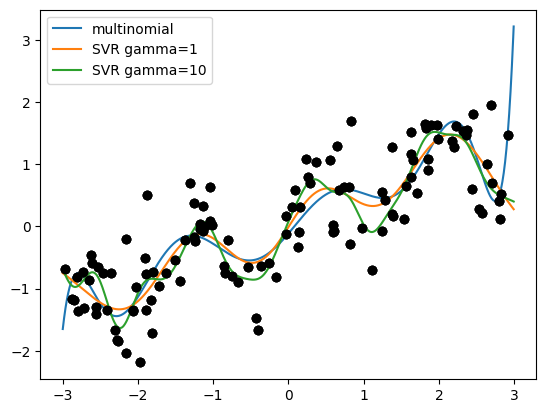

In [13]:
# multinomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
                        # 10차항까지 추가, 절편에 해당하는 1인 특성 추가안함.
poly.fit(X)
X_poly = poly.transform(X)

reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='multinomial')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc='best')
    # 1차원 데이터셋에서도 매우 부드러운 곡선을 만들지만, 데이터가 부족한 영역(x=-3,3근처)에서 너무 민감하게 동작한다.
    # 비교를 위해 원본 데이터에 svm을 학습해본다.
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))

    plt.plot(X[:,0],y,'o',c='k')
    plt.legend(loc='best')

In [23]:
# boston_dataset 에 적용
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape, X_train_poly.shape)
    # 교차특성 확장 13 -> 105 : degree=2 이기에 두 특성의 조합을 모두 포함한다.
    # poly.get_feature_names_out()으로 새 특성이 어떻게 만들어졌는지 확인가능

from sklearn.linear_model import Ridge
ridge1 = Ridge().fit(X_train_scaled, y_train)
print('no interaction score:', ridge1.score(X_test_scaled, y_test))

ridge2 = Ridge().fit(X_train_poly, y_train)
print('interaction score:', ridge2.score(X_test_poly, y_test))
    # 상호작용과 다항식 특성이 Ridge의 성능을 크게 올렸다. but rdf같은 복잡한 모델에서는 다른 결과가 나온다.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_scaled,y_train)
print('\n no interaction score:', rf.score(X_test_scaled, y_test))

rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_poly,y_train)
print('interaction score:', rf.score(X_test_poly,y_test))
    # 오히려 성능이 줄어들었다. 복잡한 모델에서는 방해가 됨

c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

(379, 13) (379, 105)
no interaction score: 0.6214583227921032
interaction score: 0.7534782020980574

 no interaction score: 0.7951668527831127
interaction score: 0.775366610027315


#### 일변량 비선형 변환
+ 앞에서 n제곱 항을 추가함으로써 회귀 모델 성능 향상을 체험하였다.

    > 마찬가지로, log, exp, sin 같은 수학함수를 적용하는 방법도 특성 변환에 유용하다.

    > 각 특성의 스케일과 분포에 민감한 선형 모델과 신경망에서 스케일 변환을 위해 사용된다.

    > 대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 낸다. log와 exp는 이런 모양을 만드는 쉽고 효과적인 방법.(정수 카운트 데이터를 다룰때 특히)

[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
test score: 0.6224186236310755
log test set score: 0.8749342372887816


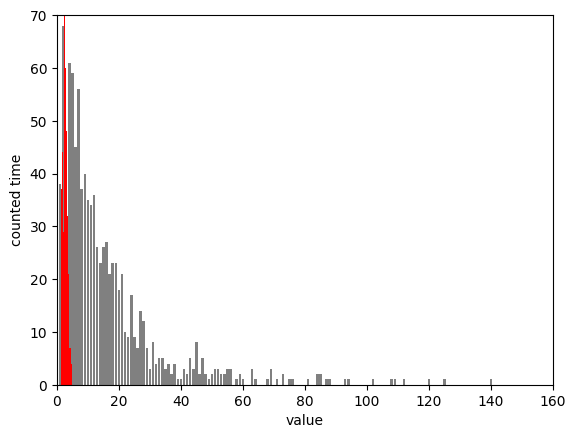

In [41]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10* np.exp(X_org)) # 포아송 분포 = 카운트 데이터의 전형적 분포
y = np.dot(X_org,w)
print(np.bincount(X[:,0]))

plt.xlim(0,160); plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='gray')
plt.ylabel('counted time'); plt.xlabel('value')
    # 선형 모델은 이런 데이터를 잘 처리하지 못한다.

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test,y_test)
print('test score:', score)

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:,0],bins=25,color='red')

score2 = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print('log test set score:',score2)
    # R2값이 유의미하게 상승.
    # 이렇게 선형 모델같이 덜 복잡한 모델(lr, 나이브 베이즈)에서는 특성변환이 필수라고 볼 수 있다.
    # 회귀에서는 y값도 변경시 더욱 도움된다.


#### 특성 자동 선택
+ 특성이 추가되면 모델은 더 복잡해지고, 과대적합될 가능성도 높아진다.

    > 가장 유용한 특성만 선택하고 나머지는 무시해서, 특성의 수를 줄이는 것이 목표

    > 일변량 통계, 모델 기반 선택, 반복적 선택 (모두 지도학습) 

##### 일변량 통계
+ 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산 후, 깊게 관련되어 있다고 판단되는 특성을 선택

    > 일변량 = 각 특성이 독립적으로 평가된다.
        > 다른 특성과 깊게 연관된 특성은 선택되지 않는다.

    > (sklearn.feature_selection) 분류는 f_classif, 회귀는 f_regression을 선택하여 테스트.

    > 계산한 p-value에 기초해 특성을 제외한다. 높은 p값 (= 타깃과 연관성이 작다.)을 제외하는 방식.

    > SelctKBest: 고정된 k개 특성 선택, SelctPercentile: 지정된 비율만큼 특성 선택

X_train.shape: (284, 80), X_train_selected.shape: (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
use all feature score : 0.9473684210526315
use selected feature score: 0.9333333333333333


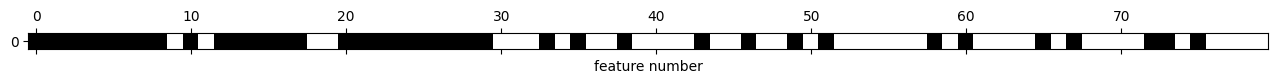

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50)) # 569,50

X_noise = np.hstack([cancer.data, noise])
    # 30개는 feature, 50개는 noise

X_train, X_test, y_train, y_test = train_test_split(X_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print('X_train.shape: {}, X_train_selected.shape: {}'.format(X_train.shape, X_train_selected.shape))
    # noise 포함 80개의 특성 > 40개의 특성

mask = select.get_support()
    # 선택된 특성을 불리언 값으로 표시 > 어떤 특성이 선택되었는지
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.yticks([0])
plt.xlabel('feature number')
    # 선택된 특성은 거의 원본이고, 노이즈 특성은 거의 제거됨.

# 전체 특성과 선택된 특성 사용시의 lr 성능 비교
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)
print('use all feature score :', lr.score(X_test,y_test))
lr.fit(X_train_selected,y_train)
print('use selected feature score:',lr.score(X_test_selected,y_test))
    # 결과가 의도한것과 다르게 나오긴했는데; 암튼 도움된다고함. 너무 많은 특성이 있어 모델을 만들기 어려울때 도움이 된다.

##### 모델 기반 특성 선택
+ 지도 학습 모델을 사용해 특성의 중요도를 평가 후 가장 중요한 특성들만 선택한다.

    > 결정트리 기반 모델의 feature_importances_, lr model의 L1 regulariztion coef_

    > 이를 다른 모델의 전처리 단계로 사용할 수 있다.

    > 일변량 분석과는 다르게 모든 특성을 한 번에 고려하므로, 사용 모델이 상호작용을 잡아낼 수 있다면, 상호작용 부분도 반영가능하다.

    > sklearn.feature_selection의 SelectFromModel

0.9473684210526315


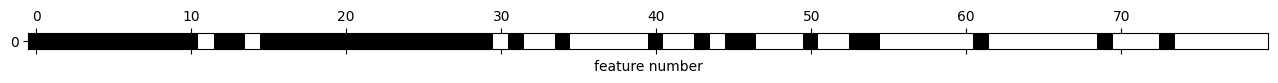

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
                                                                # 임계치 설정
        # 중요도가 임계치보다 큰 모든 특성을 선택한다. default = 'mean'

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('feature number'); plt.yticks([0])
    # 2개를 제외한 모든 원본 특성이 선택됨.

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1,y_train).score(X_test_l1,y_test)
print(score)    # 이전 select 모델보다 성능 좋아짐.

##### 반복적 특성 선택
+ 특성의 수가 각기 다른 일련의 모델을 만든다.

    > 특성을 갖지 않은 상태에서 종료 조건까지 하나 씩 추가

    > 특성을 모두 갖는 상태에서 종료 조건까지 하나 씩 제거 : 재귀적 특성 제거 RFE

selected feature test set score:  0.9403508771929825
rfe randomforest score: 0.9508771929824561


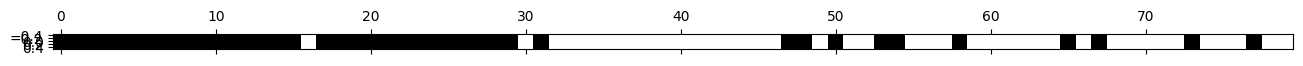

In [61]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()

plt.matshow(mask.reshape(1,-1),cmap='gray_r')

X_train_rfe = select.transform(X_train)
X_test_rfe =  select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_rfe,y_train).score(X_test_rfe,y_test)

print('selected feature test set score: ', score)
print('rfe randomforest score:', select.score(X_test,y_test))
    # 선택된 특성을 적용한 로지스틱 회귀 점수와 rfe 내부 랜덤포레스트 점수가 비슷하다.
    # == 특성 잘 선택시 선형 회귀도 랜덤포레스트에 비빌수 있다.

#### 전문가 지식 활용
+ 그 작업에 내재된 사전 지식이 특성으로 추가될 수 있다면, 알고리즘에 도움이 된다.

    > 예제 : 집 앞 자전거 대여 가능 여부 예측

c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\mglearn\datasets.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


test set R^2: -0.04
test set R^2: 0.60
test set R^2: 0.84


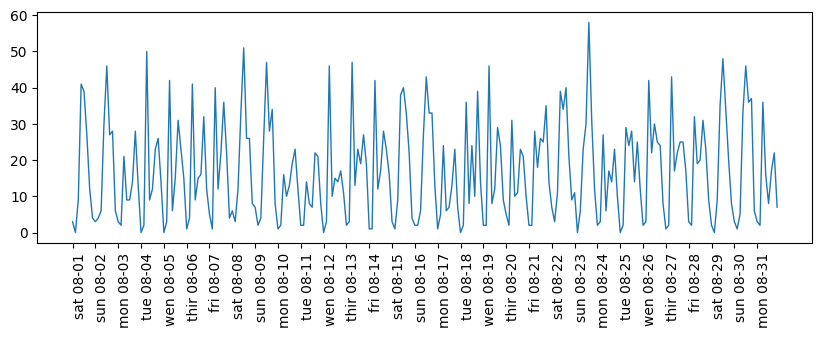

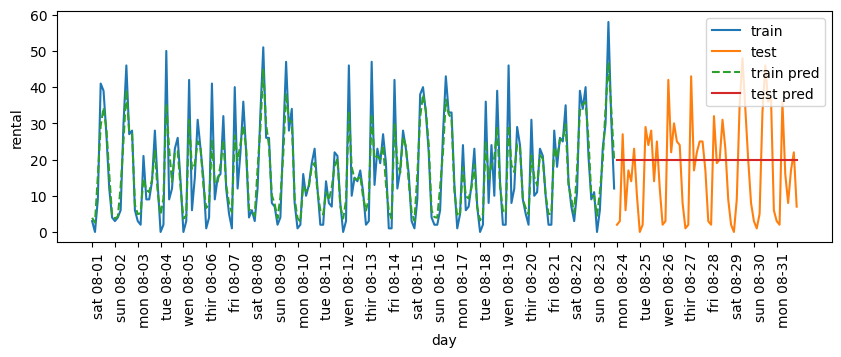

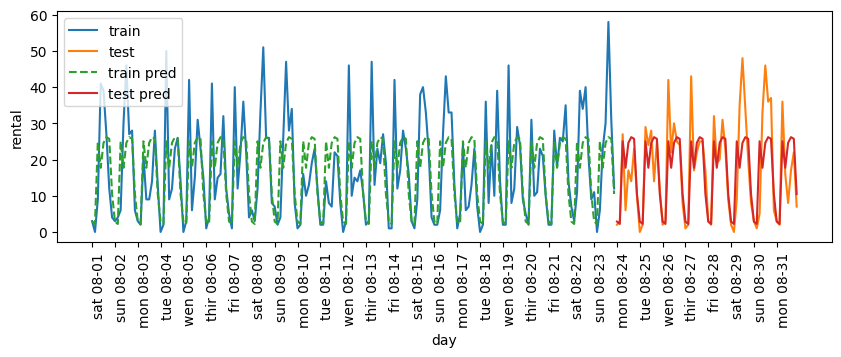

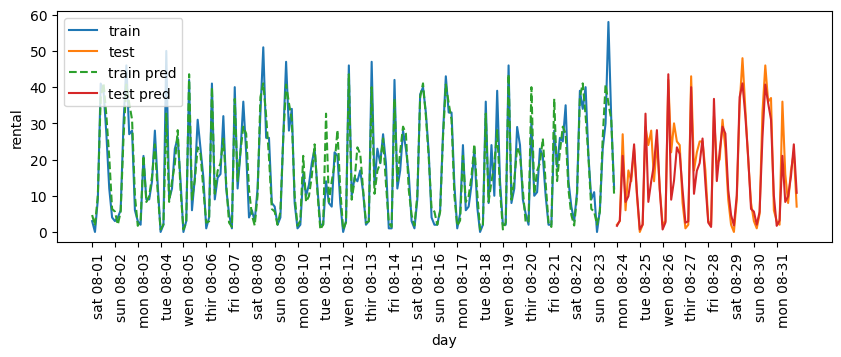

In [84]:
citibike = mglearn.datasets.load_citibike()

plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(),end = citibike.index.max(), freq='D')
week = ['sun','mon','tue','wen','thir','fri','sat']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'),xticks.strftime(' %m-%d'))]
plt.xticks(xticks,xticks_name,rotation=90, ha='left')
plt.plot(citibike,linewidth=1)
    # 낮과 밤을 구분할 수 있고, 주중과 주말의 차이도 있어 보인다.

y = citibike.values # 대여 횟수
X = citibike.index.astype('int64').values.reshape(-1,1) // 10**9 # 시간 변환

# X.shape = 248,1 이므로 184개를 훈련, 나머지는 테스트 셋으로 사용
n_train = 184

def eval_on_features(features,target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]

    regressor.fit(X_train, y_train)
    print('test set R^2: {:.2f}'.format(regressor.score(X_test,y_test)))

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8), xticks_name, rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test)+ n_train),y_test, label = 'test')
    plt.plot(range(n_train),y_pred_train,'--',label='train pred')
    plt.plot(range(n_train, len(y_test)+ n_train),y_pred,'-', label = 'test pred')
    plt.legend(loc='best')
    plt.xlabel('day')
    plt.ylabel('rental')

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X,y,regressor)
    # randomforest는 외삽이 안된다...

    # 여기서 전문가 지식이 필요. 그래프를 보면 시간과 요일이 중요한 것으로 보인다.

    # 시간만 사용해보자
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)
    # R^2값은 높아졌으나, 주간 패턴은 예측 못하고 있다. 요일정보를 추가해 보자
X_hour_week = np.hstack([citibike.index.hour.values.reshape(-1,1),citibike.index.dayofweek.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

test set R^2: 0.13
test set R^2: 0.56
test set R^2: 0.85


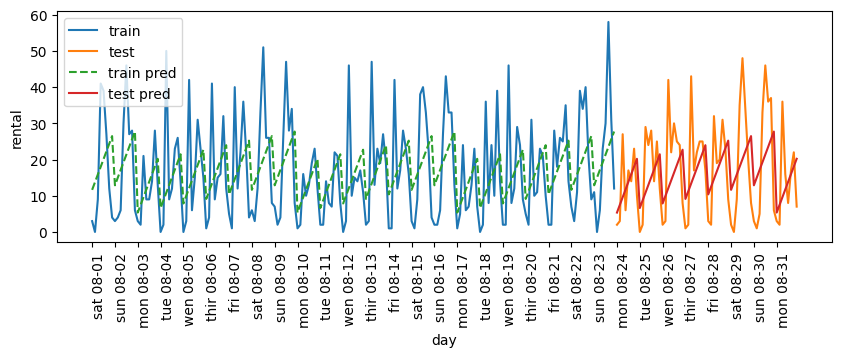

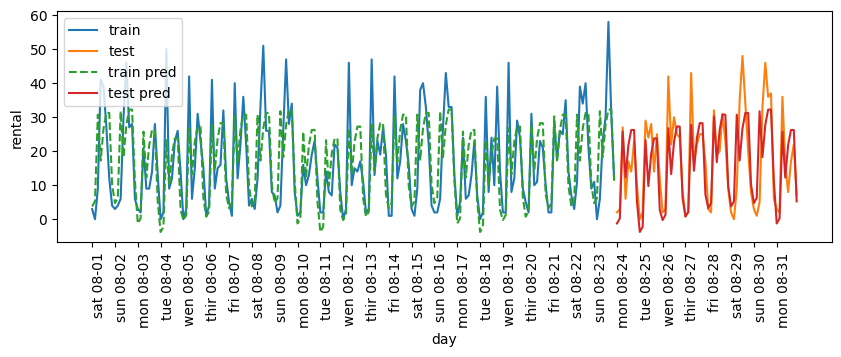

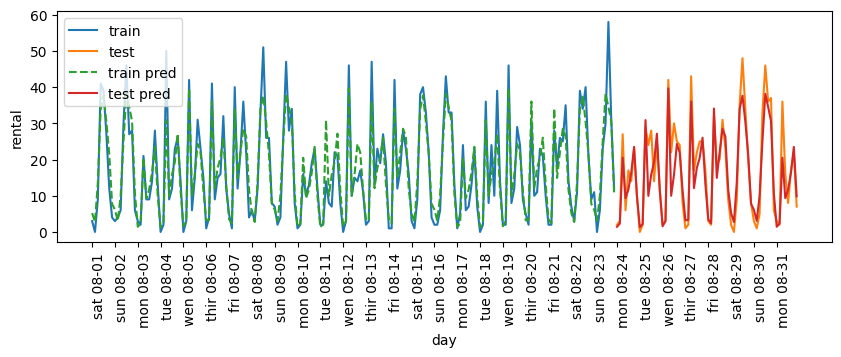

In [91]:
# 더 간단한 모델인 lr을 사용해보자
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())
    # 요일과 시간이 정수로 인코딩되어 연속형 변수로 해석해버린다. 따라서 OneHotEncoder로 범주형으로 바꿔준다.

ohe = OneHotEncoder()
X_hour_week_ohe = ohe.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_ohe,y,LinearRegression())

# 다항식까지 써보면
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hwo_poly = poly.fit_transform(X_hour_week_ohe)
lr = Ridge()
eval_on_features(X_hwo_poly,y,lr)

([<matplotlib.axis.XTick at 0x2a825cb6490>,
 [Text(0, 0, 'mon'),
  Text(1, 0, 'tue'),
  Text(2, 0, 'wen'),
  Text(3, 0, 'thir'),
  Text(4, 0, 'fri'),
  Text(5, 0, 'sat'),
  Text(6, 0, 'sun'),
  Text(7, 0, '00:00'),
  Text(8, 0, '03:00'),
  Text(9, 0, '06:00'),
  Text(10, 0, '09:00'),
  Text(11, 0, '12:00'),
  Text(12, 0, '15:00'),
  Text(13, 0, '18:00'),
  Text(14, 0, '21:00'),
  Text(15, 0, 'mon 03:00'),
  Text(16, 0, 'mon 06:00'),
  Text(17, 0, 'mon 09:00'),
  Text(18, 0, 'mon 12:00'),
  Text(19, 0, 'mon 15:00'),
  Text(20, 0, 'mon 18:00'),
  Text(21, 0, 'mon 21:00'),
  Text(22, 0, 'tue 03:00'),
  Text(23, 0, 'tue 06:00'),
  Text(24, 0, 'tue 09:00'),
  Text(25, 0, 'tue 12:00'),
  Text(26, 0, 'tue 15:00'),
  Text(27, 0, 'tue 18:00'),
  Text(28, 0, 'tue 21:00'),
  Text(29, 0, 'wen 03:00'),
  Text(30, 0, 'wen 06:00'),
  Text(31, 0, 'wen 09:00'),
  Text(32, 0, 'wen 12:00'),
  Text(33, 0, 'wen 15:00'),
  Text(34, 0, 'wen 18:00'),
  Text(35, 0, 'wen 21:00'),
  Text(36, 0, 'thir 03:00'),
  

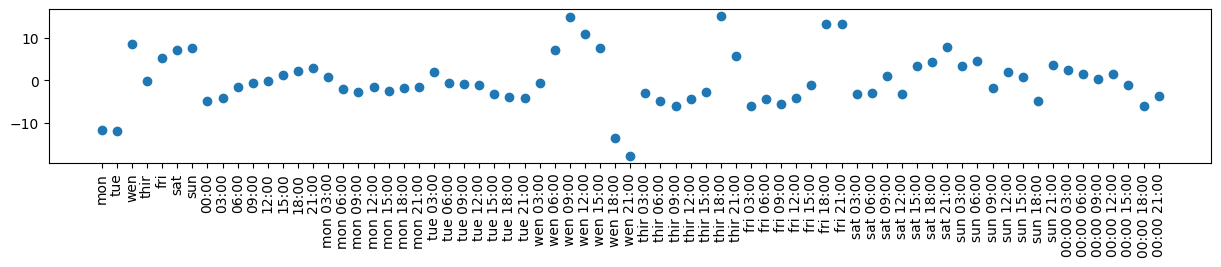

In [92]:
# 학습을 완료했으니 각 날짜와 시간에 대해 학습한 계수를 확인할 수 있다.
hour = ['%02d:00' % i for i in range(0,24,3)]
day  = ['mon','tue','wen','thir','fri','sat','sun']
features = day+hour

features_poly = poly.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)),features_nonzero, rotation=90)